In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd

import sys
sys.path.insert(0,'../')

import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
y_list = np.load('./y_list.npy')

In [3]:
t_start = time.time()
mel_layer = Spectrogram.CQT2019(sr=44100, n_bins=84*2, bins_per_octave=24, fmin=55)
time_used = time.time()-t_start
print(time_used)

Low pass filter created, time used = 16.4536 seconds
No early downsampling is required, downsample_factor =  1
Early downsampling filter created, time used = 0.0004 seconds
CQT kernels created, time used = 0.0135 seconds
STFT kernels created, time used = 0.0437 seconds
16.519136905670166


In [4]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [5]:
timing = []

for e in range(20):
    t_start = time.time()
    spec = mel_layer(y_torch)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

0.09250712394714355
0.0055429935455322266
0.004572868347167969
0.006677389144897461
0.004822731018066406
0.0045680999755859375
0.004672527313232422
0.0040738582611083984
0.0041997432708740234
0.0048503875732421875
0.004506111145019531
0.004446983337402344
0.006182670593261719
0.3908078670501709
0.4642753601074219
0.4759955406188965
0.4764266014099121
0.49396228790283203
0.4463653564453125
0.5017697811126709


In [8]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  0.17006131410598754
std =  0.21763374650265557


In [7]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch_GPU'

In [8]:
data.to_csv('CQT2019_torch_GPU')

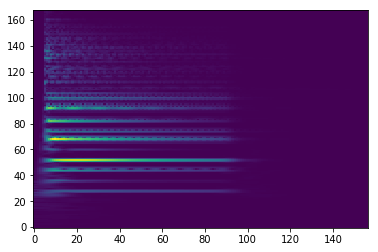

In [9]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')